In [2]:
import sklearn
import matplotlib as pl
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import scipy

In [6]:
fruits = pd.read_table('Downloads/fruit_data_with_colors.txt')

In [20]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [7]:
from matplotlib import cm

In [8]:
from pandas.plotting import scatter_matrix

In [9]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

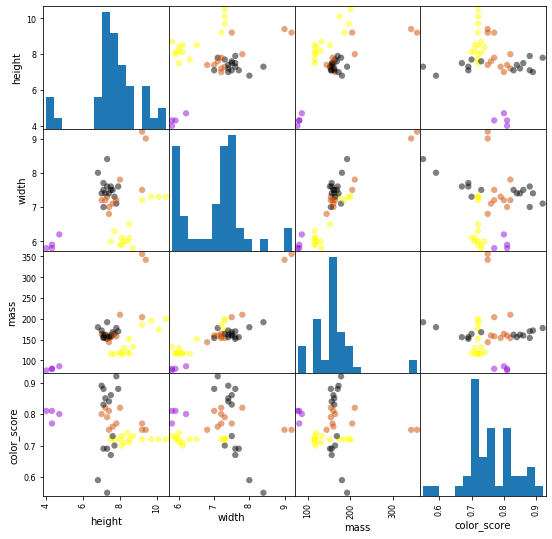

In [10]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

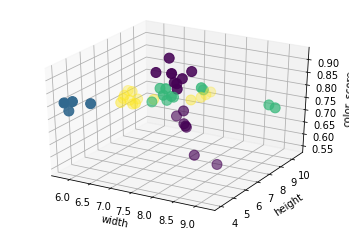

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [12]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
knn.score(X_test, y_test)

0.5333333333333333

In [16]:
from adspy_shared_utilities import plot_fruit_knn

/Users/arseniikhmara/adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
/Users/arseniikhmara/adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


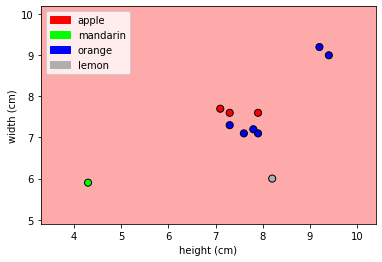

In [51]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')   # we choose 5 nearest neighbors

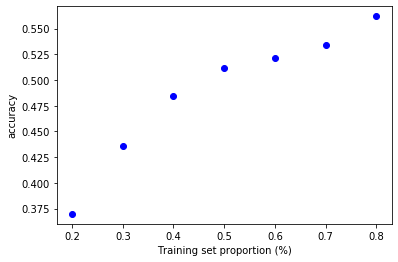

In [49]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# Assignment 1 

In [17]:
from sklearn.datasets import load_breast_cancer

In [18]:
cancer = load_breast_cancer()

In [96]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [97]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [90]:
cancer_df = pd.DataFrame(cancer['data'],columns = cancer ['feature_names'] )

In [64]:
df_columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error', 'fractal dimension error',
'worst radius', 'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'target']

In [98]:
cancer_df['target'] = cancer['target']

In [109]:
len(cancer_df[cancer_df['target']==1])

357

In [114]:
number_of_cancer = pd.Series([len(cancer_df[cancer_df['target']==0]),len(cancer_df[cancer_df['target']==1])],index= ['malignant', 'benign'],name = 'target' )

In [115]:
number_of_cancer

malignant    212
benign       357
Name: target, dtype: int64

In [124]:
def answer_one():
    return cancer_df

In [125]:
def answer_two():
    cancerdf = answer_one()
    
    # Your code here
    
    return  pd.Series([len(cancerdf[cancerdf['target']==0]),len(cancerdf[cancerdf['target']==1])],index= ['malignant', 'benign'],name = 'target' )

In [126]:
def answer_three():
    cancerdf = answer_one()
    X= cancerdf.drop('target',axis = 1)
    y = cancerdf['target']
    # Your code here
    
    return X, y

In [127]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=0, test_size = 143/569)
    
    # Your code here
    
    return X_train, X_test, y_train, y_test

In [128]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train,y_train)
    
    # Your code here
    
    return knn



In [129]:
answer_five()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [140]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    knn = answer_five()
    return knn.predict(means)

In [142]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    knn.predict(X_test)
    
    # Your code here
    
    return knn.predict(X_test)

In [145]:
answer_seven()

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [146]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    # Your code here
    
    return knn.score(X_test,y_test)

In [147]:
answer_eight()

0.916083916083916

Assignment 2

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<IPython.core.display.Javascript object>


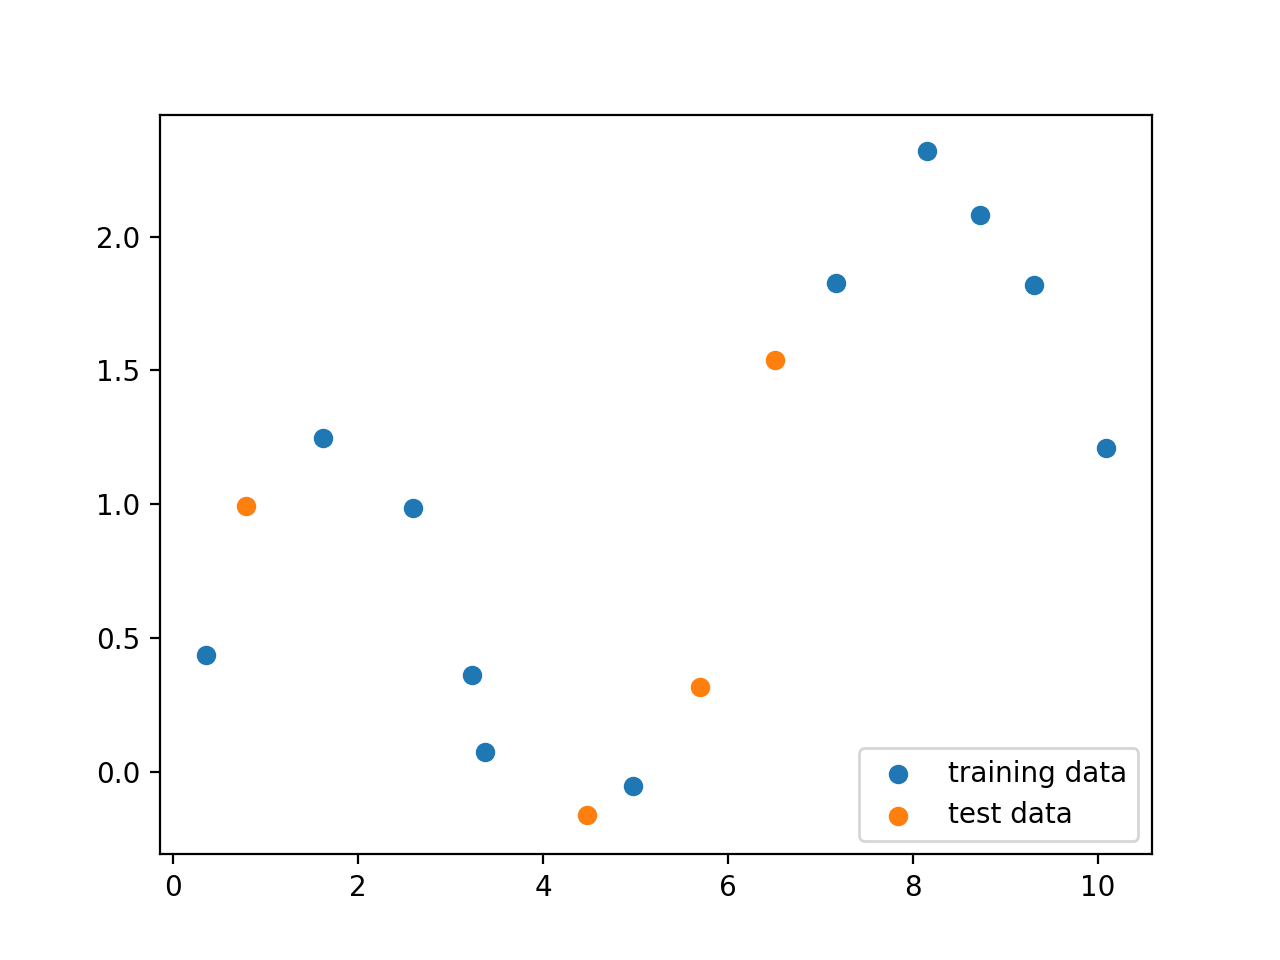

In [4]:
part1_scatter()

In [26]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    answer = []
    X_sample = X_train.reshape(-1,1)
    y_sample = y_train
    poly = PolynomialFeatures(degree=1)
    X_F1_poly = poly.fit_transform(X_sample)
    linreg = LinearRegression().fit(X_F1_poly, y_sample)
    Test_value = np.linspace(0,10,100).reshape(-1,1)
    Test_value = poly.fit_transform(Test_value)
    answer.append(linreg.predict(Test_value))
    poly3 = PolynomialFeatures(degree=3)
    poly6 = PolynomialFeatures(degree=6)
    poly9 = PolynomialFeatures(degree=9)
    X_F3_poly = poly3.fit_transform(X_sample)
    X_F6_poly = poly6.fit_transform(X_sample)
    X_F9_poly = poly9.fit_transform(X_sample)
    Test_value3 = np.linspace(0,10,100).reshape(-1,1)
    Test_value3 = poly3.fit_transform(Test_value3)
    Test_value6 = np.linspace(0,10,100).reshape(-1,1)
    Test_value6 = poly6.fit_transform(Test_value6)
    Test_value9 = np.linspace(0,10,100).reshape(-1,1)
    Test_value9= poly9.fit_transform(Test_value9)
    linreg3 = LinearRegression().fit(X_F3_poly, y_sample)
    linreg6 = LinearRegression().fit(X_F6_poly, y_sample)
    linreg9 = LinearRegression().fit(X_F9_poly, y_sample)
    answer.append(linreg3.predict(Test_value3))
    answer.append(linreg6.predict(Test_value6))
    answer.append(linreg9.predict(Test_value9))
    return np.array(answer)

In [27]:
def linear_function(n):
    poly  = PolynomialFeatures(degree=n)
    X_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
    linreg = LinearRegression().fit(X_poly, y_train)
    r2_train = r2_score(linreg.predict(X_poly),y_train)
    r2_test = r2_score(linreg.predict(X_test_poly),y_test)
    return r2_train , r2_test
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    r2_train = []
    r2_test = []
    for degree in range(10):
        train_sample , test_sample = linear_function(degree)
        r2_train.append(train_sample)
        r2_test.append(test_sample)
    return np.array(r2_train), np.array(r2_test)
        

In [28]:
from sklearn.metrics.regression import r2_score

In [30]:
linreg = linear_function(1)

In [31]:
answer_two()


(array([ 0.        , -0.32966764, -0.21680433,  0.29700138,  0.91235714,
         0.97518557,  0.99008499,  0.9934829 ,  0.99636227,  0.9980332 ]),
 array([ 0.        , -3.95883959, -7.67357761, -3.25466916,  0.19327648,
         0.82242515,  0.88606626,  0.89634375,  0.55090507, -0.68977493]))

In [32]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score
    poly = PolynomialFeatures(degree = 12)
    X_poly = poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1,1))
    linreg = LinearRegression().fit(X_poly,y_train)
    linlasso = Lasso(alpha=0.01, max_iter=10000).fit(X_poly, y_train)
    

    # Your code here

    return r2_score(linreg.predict(X_test_poly),y_test),r2_score(linlasso.predict(X_test_poly),y_test)

In [65]:
answer_four()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695889839, tolerance: 0.00068949825403828
  positive)


(0.18010030482896822, 0.6046307825816741)

MUSHROOMS

In [34]:
mush_df = pd.read_csv('Downloads/mushrooms.csv')

In [35]:
mush_df2 = pd.get_dummies(mush_df)

In [36]:
mush_df2

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [37]:
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [39]:
X_subset = X_test2
y_subset = y_test2

In [40]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    return clf.feature_importances_

In [41]:
a = answer_five()

In [42]:
X_train2.columns[[27,53,55,100,25]]

Index(['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r',
       'odor_l'],
      dtype='object')

In [61]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    clf = SVC(kernel = 'rbf', C=1 ,random_state = 0)
    param_range = np.logspace(-4,1, 6)
    train_scores, test_scores = validation_curve(
                                clf, X_subset, y_subset, param_name="gamma", param_range=param_range,
                                scoring="accuracy", )
    train_mean = []
    test_mean = []
    for i in range(6):
        train_mean.append(np.mean(train_scores[i]))
        test_mean.append(np.mean(test_scores[i]))
    return train_mean , test_mean        # Your code here


In [62]:
answer_six()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


([0.5664784726268103, 0.9315595109758, 0.9903988148247267, 1.0, 1.0, 1.0],
 [0.5676854692294913,
  0.9295955798354459,
  0.9896595224836284,
  1.0,
  0.9950799438226953,
  0.52240278949055])

In [63]:
 np.logspace(-4,1, 6)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

SyntaxError: invalid token (<ipython-input-64-eae168d3a2e7>, line 1)

In [66]:
X_train

array([10.08877265,  3.23065446,  1.62431903,  9.31004929,  7.17166586,
        4.96972856,  8.14799756,  2.59103578,  0.35281047,  3.375973  ,
        8.72363612])

In [67]:
X_test

array([0.79431716, 4.47573197, 5.69364194, 6.51069113])